# Flight Data Analysis 

In [62]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [63]:
#import dataset
data = pd.read_csv('flights.csv',low_memory=False)
print(data.shape)

(4846846, 31)


In [64]:
#selecting smaller sample dataset
data = data.iloc[1:100001,]
data.head(n=10)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
1   2015      1    1            4      AA         2336.0      N3KUAA   
2   2015      1    1            4      US          840.0      N171US   
3   2015      1    1            4      AA          258.0      N3HYAA   
4   2015      1    1            4      AS          135.0      N527AS   
5   2015      1    1            4      DL          806.0      N3730B   
6   2015      1    1            4      NK          612.0      N635NK   
7   2015      1    1            4      US         2013.0      N584UW   
8   2015      1    1            4      AA         1112.0      N3LAAA   
9   2015      1    1            4      DL         1173.0      N826DN   
10  2015      1    1            4      DL         2336.0      N958DN   

   ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
1             LAX                 PBI                 10.0  ...         741.0   
2             SFO                 CLT                 20.0  ...         811.0   
3             LAX                 MIA                 20.0  ...         756.0   
4             SEA                 ANC                 25.0  ...         259.0   
5             SFO                 MSP                 25.0  ...         610.0   
6             LAS                 MSP                 25.0  ...         509.0   
7             LAX                 CLT                 30.0  ...         753.0   
8             SFO                 DFW                 30.0  ...         532.0   
9             LAS                 ATL                 30.0  ...         656.0   
10            DEN                 ATL                 30.0  ...         453.0   

    ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
1            -9.0       0.0        0.0                  NaN               NaN   
2             5.0       0.0        0.0                  NaN               NaN   
3            -9.0       0.0        0.0                  NaN               NaN   
4           -21.0       0.0        0.0                  NaN               NaN   
5             8.0       0.0        0.0                  NaN               NaN   
6           -17.0       0.0        0.0                  NaN               NaN   
7           -10.0       0.0        0.0                  NaN               NaN   
8           -13.0       0.0        0.0                  NaN               NaN   
9           -15.0       0.0        0.0                  NaN               NaN   
10          -30.0       0.0        0.0                  NaN               NaN   

    SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
1              NaN            NaN                  NaN            NaN  
2              NaN            NaN                  NaN            NaN  
3              NaN            NaN                  NaN            NaN  
4              NaN            NaN                  NaN            NaN  
5              NaN            NaN                  NaN            NaN  
6              NaN            NaN                  NaN            NaN  
7              NaN            NaN                  NaN            NaN  
8              NaN            NaN                  NaN            NaN  
9              NaN            NaN                  NaN            NaN  
10             NaN            NaN                  NaN            NaN  

[10 rows x 31 columns]

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  float64
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  float64
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME     

In [66]:
#checking number of flights that got diverted
data['DIVERTED'].value_counts()

0.0    99776
1.0      224
Name: DIVERTED, dtype: int64

In [67]:
data.describe()

YEAR     MONTH            DAY    DAY_OF_WEEK  FLIGHT_NUMBER  \
count  100000.0  100000.0  100000.000000  100000.000000  100000.000000   
mean     2015.0       1.0       3.733980       4.107300    2240.842630   
std         0.0       0.0       1.815551       2.098454    1818.701297   
min      2015.0       1.0       1.000000       1.000000       1.000000   
25%      2015.0       1.0       2.000000       2.000000     759.000000   
50%      2015.0       1.0       4.000000       4.000000    1693.000000   
75%      2015.0       1.0       5.000000       6.000000    3394.000000   
max      2015.0       1.0       7.000000       7.000000    7438.000000   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count        100000.000000    97702.000000     97702.000000  97629.000000   
mean           1306.359320     1326.253035        19.938026     17.155855   
std             482.308353      503.498792        45.843472     10.738369   
min               5.000000        1.000000       -39.000000      1.000000   
25%             904.000000      911.000000        -3.000000     11.000000   
50%            1300.000000     1317.000000         3.000000     14.000000   
75%            1720.000000     1739.000000        25.000000     20.000000   
max            2359.000000     2400.000000      1380.000000    176.000000   

         WHEELS_OFF  ...  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
count  97629.000000  ...      100000.000000  97560.000000   97387.000000   
mean    1348.437677  ...        1481.128760   1458.043594      18.342510   
std      504.125185  ...         498.905978    538.202039      48.878107   
min        1.000000  ...           1.000000      1.000000     -65.000000   
25%      928.000000  ...        1100.000000   1050.000000      -8.000000   
50%     1330.000000  ...        1500.000000   1455.000000       4.000000   
75%     1753.000000  ...        1908.000000   1911.000000      27.000000   
max     2400.000000  ...        2359.000000   2400.000000    1384.000000   

            DIVERTED      CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count  100000.000000  100000.000000      34625.000000    34625.000000   
mean        0.002240       0.023890         14.026801        0.070787   
std         0.047276       0.152707         25.965405        1.692526   
min         0.000000       0.000000          0.000000        0.000000   
25%         0.000000       0.000000          0.000000        0.000000   
50%         0.000000       0.000000          4.000000        0.000000   
75%         0.000000       0.000000         19.000000        0.000000   
max         1.000000       1.000000        590.000000      107.000000   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count   34625.000000         34625.000000   34625.000000  
mean       17.853921            26.014556       2.751971  
std        43.527539            42.593343      17.265760  
min         0.000000             0.000000       0.000000  
25%         0.000000             0.000000       0.000000  
50%         4.000000            10.000000       0.000000  
75%        19.000000            35.000000       0.000000  
max      1380.000000           891.000000     562.000000  

[8 rows x 26 columns]

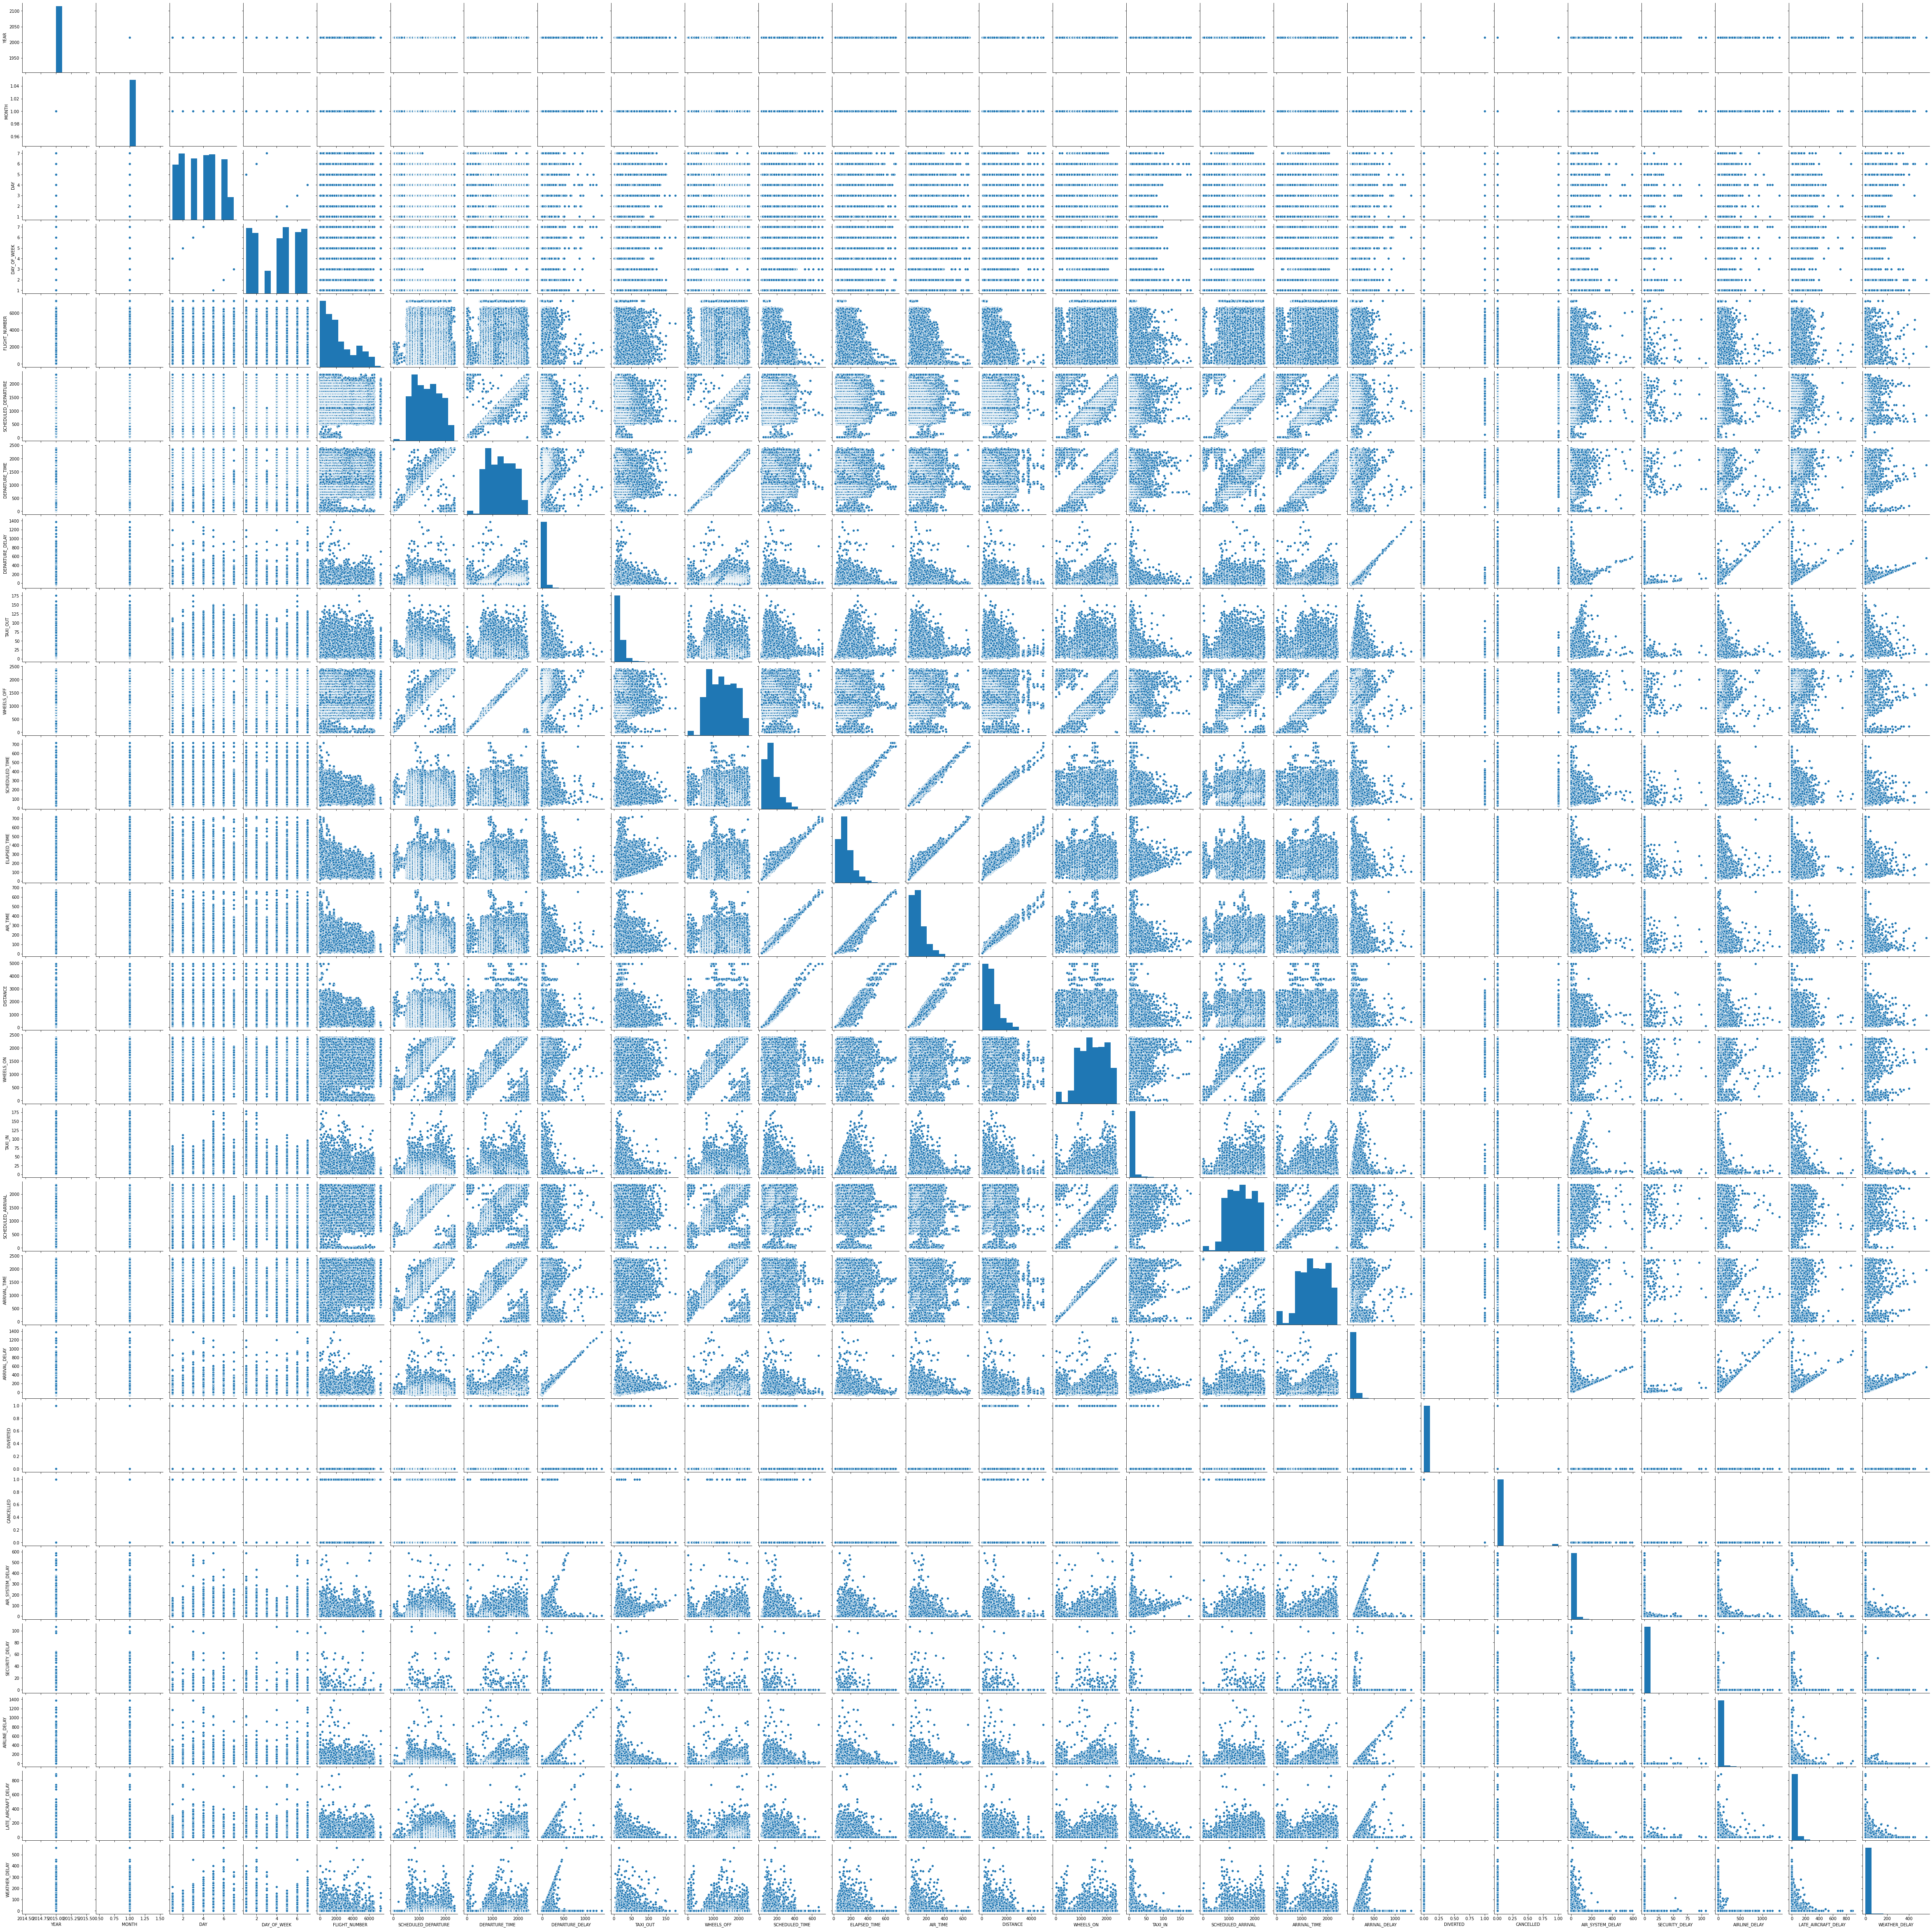

In [68]:
#pair plot to analyse correlation

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

In [69]:
data.corr()

YEAR  MONTH       DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
YEAR                  NaN    NaN       NaN          NaN            NaN   
MONTH                 NaN    NaN       NaN          NaN            NaN   
DAY                   NaN    NaN  1.000000    -0.497092       0.004388   
DAY_OF_WEEK           NaN    NaN -0.497092     1.000000       0.010956   
FLIGHT_NUMBER         NaN    NaN  0.004388     0.010956       1.000000   
SCHEDULED_DEPARTURE   NaN    NaN -0.138182     0.046916      -0.003058   
DEPARTURE_TIME        NaN    NaN -0.124347     0.045186       0.010166   
DEPARTURE_DELAY       NaN    NaN  0.060052     0.055633       0.034856   
TAXI_OUT              NaN    NaN  0.093452     0.007292       0.061015   
WHEELS_OFF            NaN    NaN -0.119833     0.044152       0.016347   
SCHEDULED_TIME        NaN    NaN -0.026241     0.019746      -0.337796   
ELAPSED_TIME          NaN    NaN -0.018432     0.029017      -0.318816   
AIR_TIME              NaN    NaN -0.036288     0.030669      -0.339131   
DISTANCE              NaN    NaN -0.035156     0.024655      -0.356188   
WHEELS_ON             NaN    NaN -0.095753     0.013745      -0.003696   
TAXI_IN               NaN    NaN  0.037388    -0.017786       0.014460   
SCHEDULED_ARRIVAL     NaN    NaN -0.110844     0.031722      -0.018918   
ARRIVAL_TIME          NaN    NaN -0.091709     0.011473       0.000728   
ARRIVAL_DELAY         NaN    NaN  0.070750     0.067522       0.056155   
DIVERTED              NaN    NaN  0.004845    -0.000709       0.007154   
CANCELLED             NaN    NaN -0.006005    -0.006408       0.090007   
AIR_SYSTEM_DELAY      NaN    NaN  0.097693    -0.019626      -0.032564   
SECURITY_DELAY        NaN    NaN -0.010550     0.008156      -0.007260   
AIRLINE_DELAY         NaN    NaN -0.001603     0.003648       0.023770   
LATE_AIRCRAFT_DELAY   NaN    NaN  0.033213     0.033729       0.076581   
WEATHER_DELAY         NaN    NaN  0.061960    -0.050835       0.004246   

                     SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
YEAR                                 NaN             NaN              NaN   
MONTH                                NaN             NaN              NaN   
DAY                            -0.138182       -0.124347         0.060052   
DAY_OF_WEEK                     0.046916        0.045186         0.055633   
FLIGHT_NUMBER                  -0.003058        0.010166         0.034856   
SCHEDULED_DEPARTURE             1.000000        0.943298         0.174243   
DEPARTURE_TIME                  0.943298        1.000000         0.243980   
DEPARTURE_DELAY                 0.174243        0.243980         1.000000   
TAXI_OUT                       -0.081489       -0.070089         0.061908   
WHEELS_OFF                      0.912226        0.966588         0.231390   
SCHEDULED_TIME                 -0.019858       -0.031897         0.005872   
ELAPSED_TIME                   -0.025732       -0.035224         0.015260   
AIR_TIME                       -0.011981       -0.024405         0.002736   
DISTANCE                        0.000340       -0.016591         0.004596   
WHEELS_ON                       0.585761        0.618913         0.090683   
TAXI_IN                        -0.027516       -0.017746         0.040281   
SCHEDULED_ARRIVAL               0.731222        0.735042         0.155139   
ARRIVAL_TIME                    0.552627        0.584677         0.079627   
ARRIVAL_DELAY                   0.154936        0.223678         0.950838   
DIVERTED                        0.002514        0.006577         0.020787   
CANCELLED                      -0.002635        0.009680         0.030862   
AIR_SYSTEM_DELAY               -0.112393       -0.093096         0.085794   
SECURITY_DELAY                 -0.017957       -0.012820         0.008040   
AIRLINE_DELAY                  -0.054419       -0.013304         0.606954   
LATE_AIRCRAFT_DELAY             0.186286        0.247325         0.605289   
WEATHER_DELAY       

<AxesSubplot:>

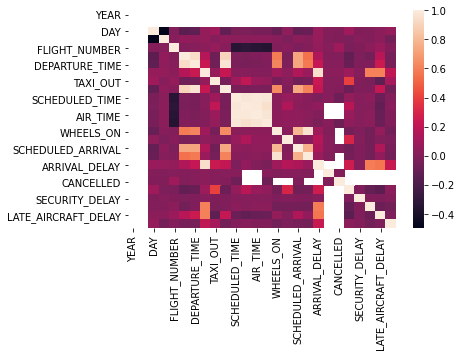

In [70]:
#heatmap
sns.heatmap(data.corr())

In [71]:
#selecting required features
data = data[['MONTH','DAY','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_DELAY','SCHEDULED_ARRIVAL','ARRIVAL_DELAY','DIVERTED','CANCELLED','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']]

In [72]:
#checking for null values 
data.isnull().sum()

MONTH                      0
DAY                        0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_DELAY         2298
SCHEDULED_ARRIVAL          0
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [73]:
#filling null values mean value
data['DEPARTURE_DELAY'].fillna(value=data['DEPARTURE_DELAY'].mean(), inplace=True)
data['ARRIVAL_DELAY'].fillna(value=data['ARRIVAL_DELAY'].mean(), inplace=True)
data['AIR_SYSTEM_DELAY'].fillna(value=data['AIR_SYSTEM_DELAY'].mean(), inplace=True)
data['SECURITY_DELAY'].fillna(value=data['SECURITY_DELAY'].mean(), inplace=True)
data['AIRLINE_DELAY'].fillna(value=data['AIRLINE_DELAY'].mean(), inplace=True)
data['LATE_AIRCRAFT_DELAY'].fillna(value=data['LATE_AIRCRAFT_DELAY'].mean(), inplace=True)
data['WEATHER_DELAY'].fillna(value=data['WEATHER_DELAY'].mean(), inplace=True)

In [74]:
data.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [75]:
#adding result column

result=[]
for value in data['ARRIVAL_DELAY']:
    if value > 15:
        result.append(1)
    else:
        result.append(0) 
        
data['result'] = result
data['result'].value_counts()

0    63779
1    36221
Name: result, dtype: int64

In [76]:
#selecting features for model building
data = data[['MONTH','DAY','SCHEDULED_DEPARTURE','DEPARTURE_DELAY','SCHEDULED_ARRIVAL','DIVERTED','CANCELLED','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','result']]

In [78]:
#split x and y
x= data.iloc[:,:-1]
y= data.iloc[:,-1]

In [79]:
#split into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)

In [80]:
print(x_train.shape)

(70000, 12)


In [81]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform(x_train, x_test)

In [82]:
#model building
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
model = clf.fit(x_train,y_train)

In [83]:
#prediction
pred = model.predict(x_test)

In [84]:
#auc_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

auc_score = roc_auc_score(y_test, pred)
auc_score

0.9981149353790864

In [85]:
#metrics
print(metrics.accuracy_score(y_test, pred))

0.9982


In [86]:
print(confusion_matrix(y_test, pred))

[[19050    30]
 [   24 10896]]


In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19080
           1       1.00      1.00      1.00     10920

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

